# Case study 3: Augusta Raurica (Augst), Switzerland

## Contents 
1. [<span style="color:black">Import packages</span>](#1) <a id="one"></a>  
2. [<span style="color:black">Read in data</span>](#2)  <a id="two"></a>  
3. [<span style="color:black">Augst origin frequency: type and site dates</span>](#3) <a id="three"></a>  
4. [<span style="color:black">Augst contents frequency: type and site dates</span>](#4)  <a id="four"></a>   
5. [<span style="color:black">RAAD type number count per dating type per year: Augst</span>](#5)  <a id="five"></a>   

In [1]:
def set_key(origin: str) -> str:
    if origin == "iberianpeninsula":
        key = "Iberian Peninsula"
    elif origin == "em":
        key = "Eastern Mediterranean"
    elif origin == "northafrica":
        key = "North Africa"
    else:
        key = origin.capitalize()
    return key

### [<span style="color:black">1. Import packages</span>](#one) <a id="1"></a> 

In [2]:
import sys

sys.path.append("../../src")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from calculation import sum_freq_per_year, year_freq_df, year_object_count_df
from plot import plot_graph 

### [<span style="color:black">2. Read in data</span>](#two)  <a id="2"></a>

In [3]:
data = pd.read_csv("../data/RAAD_data_restructured.csv")
data["origin_h2"] = data["origin_h2"].fillna('')

In [4]:
origins = ["iberianpeninsula", "gaul", "em", "italy", "northafrica", "germania"] 
contents = ["wine", "olive oil", "fish sauce", "fruit"]
start_dates = ["raad_type_start_date", "site_start_date"]
end_dates = ["raad_type_end_date", "site_end_date"]

freq_type_dates = {}
freq_contents_type= {}

form_count_dates = {}
list_of_dfs = []

### [<span style="color:black">3. Augst origin frequency: type dates</span>](#three) <a id="3"></a>

In [5]:
for origin in origins:
    df = data.groupby(["RAAD_form", "raad_type_start_date", "raad_type_end_date","site_name_modern", "origin_h1"])["frequency"].sum()
    df = df.reset_index()
    df = df.rename(columns = {"frequency": "summed_freq"})

    df1 = sum_freq_per_year(data = df,
                            sum_freq = "summed_freq",
                            lower_date = "raad_type_start_date",
                            upper_date = "raad_type_end_date")

    freq = year_freq_df(data = df1[(df1["site_name_modern"] == "augst") & (df1["origin_h1"] == origin)],    
                                    lower_date = "raad_type_start_date",
                                    upper_date = "raad_type_end_date",
                                    sum_freq = "Sum_freq_per_year")   
    key = set_key(origin)

    freq_type_dates[key] = freq

/tmp/ipykernel_6542/2870173845.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


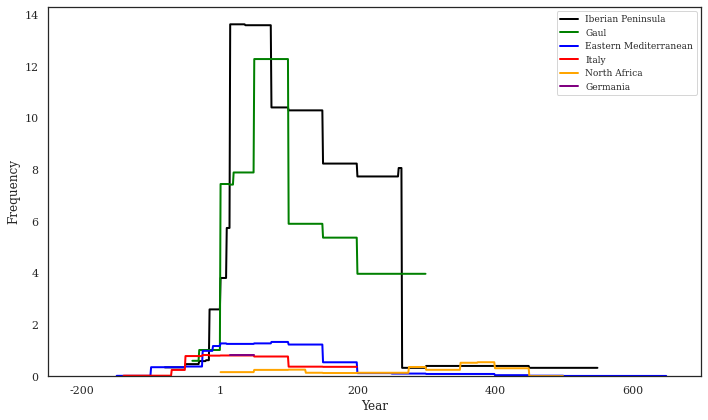

In [14]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 
fig, ax= plt.subplots(figsize=(10, 6))

plot_graph(dicts_of_df = freq_type_dates,
            palette=["black", "green", "blue", "red", "orange", "purple"],
            ax = ax,
            linewidth = 2)
               
ax.set_xlim([-250, 700])
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

plt.legend(fontsize = 9)
plt.tight_layout()
plt.savefig("Figs/Fig9d.tiff", bbox_inches="tight", format = "tiff", dpi = 400)

### [<span style="color:black">4. Augst contents frequency: type dates</span>](#four) <a id="4"></a>  

In [8]:
for cont in contents:
    df = data.groupby(["RAAD_form", "raad_type_start_date", "raad_type_end_date", "contents", "site_name_modern"])["frequency"].sum()
    df = df.reset_index()
    df = df.rename(columns = {"frequency": "summed_freq"})

    df1 = sum_freq_per_year(data = df,
                            sum_freq = "summed_freq",
                            lower_date = "raad_type_start_date",
                            upper_date = "raad_type_end_date")

    freq = year_freq_df(data = df1[(df1["contents"] == cont) & (df1["site_name_modern"] == "augst")],     
                        lower_date = "raad_type_start_date",
                        upper_date = "raad_type_end_date",
                        sum_freq = "Sum_freq_per_year")  
                         
    label = cont.capitalize()
    
    freq_contents_type[label] = freq

/tmp/ipykernel_6542/1677956640.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


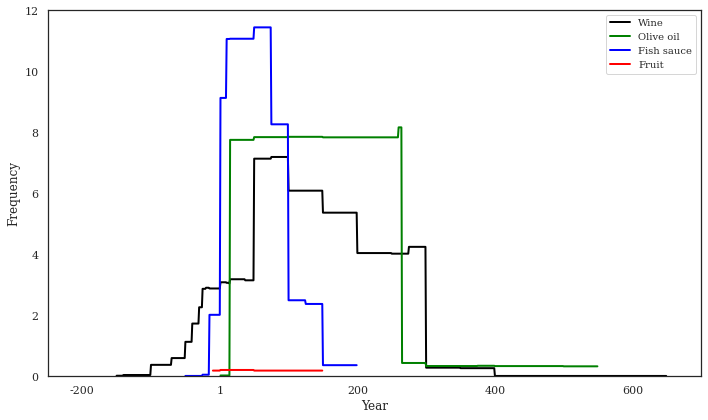

In [15]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 
fig, ax= plt.subplots(figsize=(10, 6))

ax.set_xlim([-250, 700])

plot_graph(dicts_of_df = freq_contents_type,
            palette=["black", "green", "blue", "red"],
            ax = ax,
            linewidth = 2)
               
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

plt.legend(fontsize = 10)
plt.tight_layout()
plt.savefig("Figs/Fig9c.tiff", bbox_inches="tight", format = "tiff", dpi = 400)

### [<span style="color:black">5. RAAD type number count per dating type per year: Augst</span>](#five) <a id="5"></a>

In [11]:
for start, end in zip(start_dates, end_dates):
    df = data.groupby(["RAAD_form", start, end, "site_name_modern"])["RAAD_type_number"].apply(list)
    df = df.reset_index()
    df = df.rename(columns = {"RAAD_type_number":"List_of_numbers"})
    
    num_count = year_object_count_df(data = df[df["site_name_modern"] == "augst"],  
                                     lower_date = start,  
                                     upper_date = end,
                                     object_list = "List_of_numbers")  

    if "raad" in start or "raad" in end: 
        key = "Type dates"  
    else:
        key = "Site dates" 
    form_count_dates[key] = num_count
        
list_of_dfs.append(form_count_dates)   

/tmp/ipykernel_6542/98916597.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])


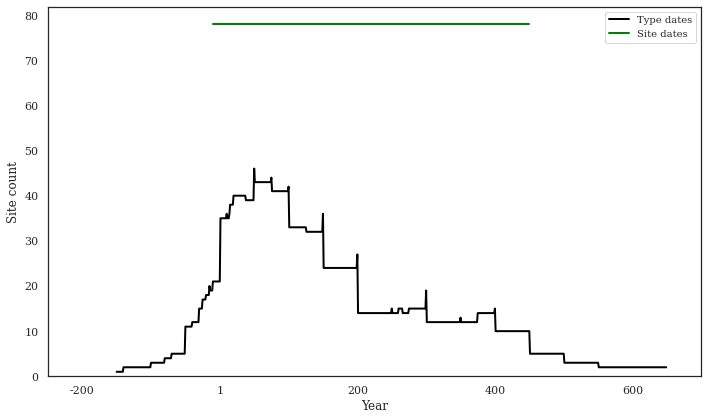

In [16]:
sns.set_style("white", {"font.family":"serif", "font.serif":"Times New Roman"}) 
fig, ax= plt.subplots(figsize=(10, 6))

ax.set_xlim([-250, 700])

for df in list_of_dfs:
    plot_graph(dicts_of_df = df,
            palette=["black", "green"],
            ax = ax,
            linewidth = 2)
               
ax.set_ylim(0, None) 
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))  
ax.set_xticklabels([int(i) if i != 0 else 1 for i in ax.get_xticks()])

plt.legend(fontsize = 10)
plt.tight_layout()
plt.savefig("Figs/Fig9e.tiff", bbox_inches="tight", format = "tiff", dpi = 400)